# Health Professional Shortage Areas - Exploratory Data Analysis
---
### Which regions/states/counties in the U.S. are facing the most severe shortages of healthcare professionals?
---

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from get_cleaned_hpsa import hpsa

In [2]:
# Get info about cleaned hpsa dataframe
hpsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 346 to 64846
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   HPSA Name                              1047 non-null   object        
 1   Designation Type                       1047 non-null   object        
 2   HPSA Score                             1047 non-null   int64         
 3   HPSA Status                            1047 non-null   object        
 4   HPSA Designation Date                  1047 non-null   datetime64[ns]
 5   HPSA Designation Last Update Date      1047 non-null   datetime64[ns]
 6   HPSA FTE                               1047 non-null   float64       
 7   HPSA Designation Population            1047 non-null   float64       
 8   % of Population Below 100% Poverty     1047 non-null   float64       
 9   HPSA Formal Ratio                      870 non-null    objec

### Which U.S. regions have the highest number of HPSA counties?
#### **Answer: Southeast (Region 4 - 291 counties) and South Central (Region 6 - 233 counties)**

In [21]:
region = hpsa.groupby(['Common Region Name', 'Region Alias'])

region['HPSA Name'].count().sort_values(ascending = False)

Common Region Name  Region Alias      
Region 4            Southeast             291
Region 6            South Central         233
Region 5            Great Lakes           147
Region 8            Rocky Mountains       138
Region 7            Northern Plains        88
Region 3            Mid Atlantic           81
Region 10           North Far West         47
Region 9            South Far West         16
Region 2            Northeast Corridor      4
Region 1            New England             2
Name: HPSA Name, dtype: int64

### Which regions have the highest average HPSA Score?
#### **Answer: Southeast (Region 4 - score 14.4) and South Central (Region 6 - score 13.3)**

In [22]:
region['HPSA Score'].describe()

,,count,mean,std,min,25%,50%,75%,max
Common Region Name,Region Alias,,,,,,,,
Region 1,New England,2.0,10.000000,1.414214,9.0,9.50,10.0,10.5,11.0
Region 10,North Far West,47.0,12.787234,3.243295,7.0,11.00,13.0,15.0,22.0
Region 2,Northeast Corridor,4.0,7.250000,0.957427,6.0,6.75,7.5,8.0,8.0
Region 3,Mid Atlantic,81.0,11.827160,3.015751,4.0,10.00,12.0,14.0,21.0
Region 4,Southeast,291.0,14.371134,3.606468,5.0,12.00,14.0,17.0,23.0
Region 5,Great Lakes,147.0,11.081633,2.978255,4.0,9.00,11.0,13.0,19.0
Region 6,South Central,233.0,13.291845,3.361903,4.0,11.00,13.0,16.0,20.0
Region 7,Northern Plains,88.0,9.840909,2.819825,4.0,8.00,10.0,12.0,16.0
Region 8,Rocky Mountains,138.0,13.028986,3.652700,4.0,11.00,13.0,15.0,22.0


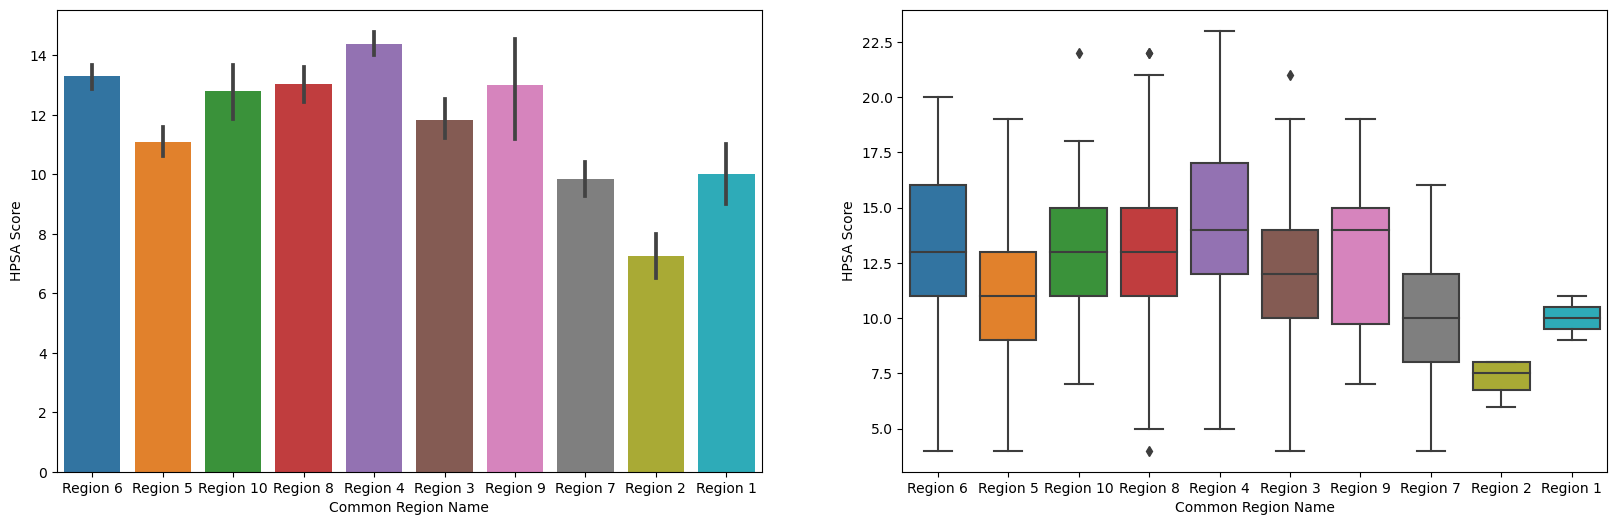

In [32]:
# Create barplot and boxplot for HPSA Score by region
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.subplot(1, 2, 2)
sns.boxplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.show()

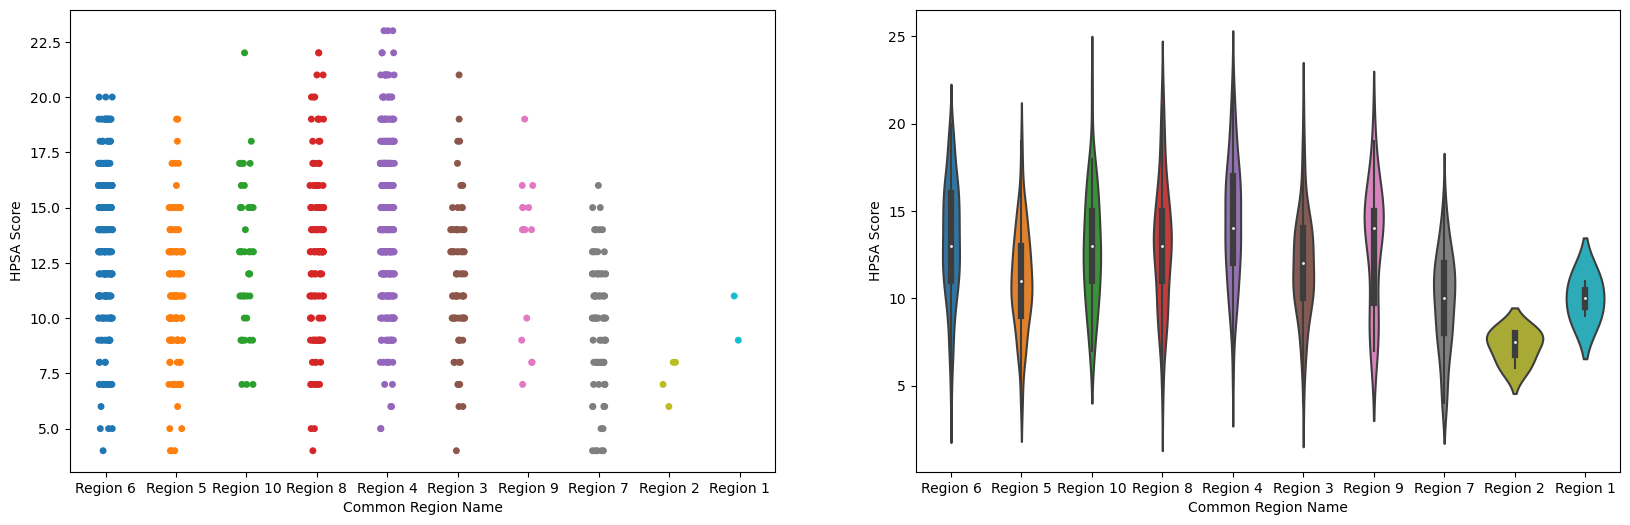

In [36]:
# Create barplot and boxplot for HPSA Score by region
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(hpsa, x = 'Common Region Name', y = 'HPSA Score', hue = 'Common Region Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.show()

### Let's just focus on Southeast (Region 4) and South Central (Region 6).

In [40]:
# Subset the hpsa dataframe to only include rows from Region 4 and Region 6
# Call this new subsetted dataframe sesc (Southeast & South Central)
regions = ['Region 4', 'Region 6']

sesc = hpsa[hpsa['Common Region Name'].isin(regions)]

In [42]:
# Check that sesc is sampling the correct data
sesc['Common Region Name'].value_counts()

Region 4    291
Region 6    233
Name: Common Region Name, dtype: int64

### In each region, which states have the highest count of HPSA counties?
#### **Answer: Southeast (Kentucky - 57, Georgia - 55, Mississippi - 54, Alabama - 49) and South Central (Texas - 139)**

In [43]:
sesc.groupby(['Common Region Name', 'Region Alias', 'Common State Name'])['HPSA Name'].count()

Common Region Name  Region Alias   Common State Name
Region 4            Southeast      Alabama               49
                                   Florida               14
                                   Georgia               55
                                   Kentucky              57
                                   Mississippi           54
                                   North Carolina        19
                                   South Carolina        15
                                   Tennessee             28
Region 6            South Central  Arkansas              19
                                   Louisiana             36
                                   New Mexico            22
                                   Oklahoma              17
                                   Texas                139
Name: HPSA Name, dtype: int64

### Let's focus on those five states.

In [52]:
# Further subset sesc dataframe to only include rows from Kentucky, Georgia, Mississippi, Alabama, and Texas)
states = ['Kentucky', 'Georgia', 'Mississippi', 'Alabama', 'Texas']
sesc = sesc[sesc['Common State Name'].isin(states)]

### Which state has the highest average HPSA score?
#### **Answer: Mississippi - 15.6

In [55]:
sesc.groupby('Common State Name')['HPSA Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Common State Name,,,,,,,,
Alabama,49.0,14.632653,4.270509,5.0,12.0,15.0,18.0,23.0
Georgia,55.0,14.309091,3.393200,6.0,12.0,14.0,17.0,22.0
Kentucky,57.0,13.298246,3.327187,8.0,11.0,13.0,16.0,19.0
Mississippi,54.0,15.611111,3.657077,9.0,13.0,15.5,18.0,23.0
Texas,139.0,12.899281,3.508365,4.0,11.0,13.0,15.5,20.0


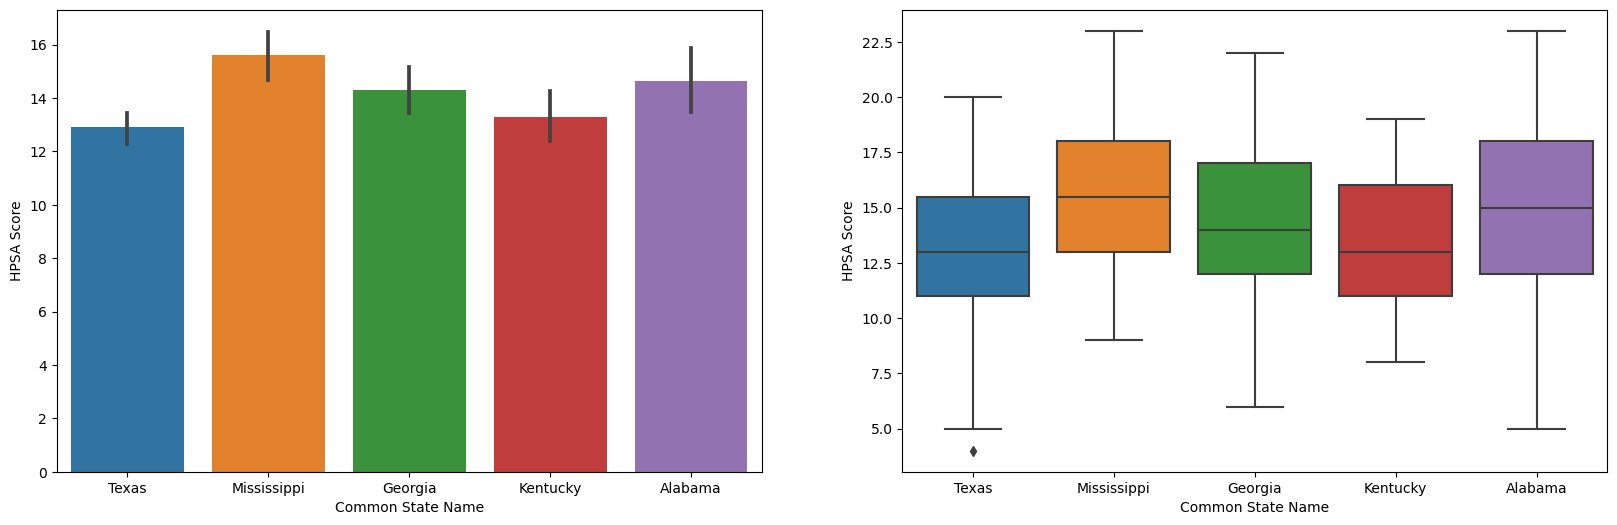

In [59]:
# Create barplot and boxplot for HPSA Score by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(sesc, x = 'Common State Name', y = 'HPSA Score')

plt.subplot(1, 2, 2)
sns.boxplot(sesc, x = 'Common State Name', y = 'HPSA Score')

plt.show()

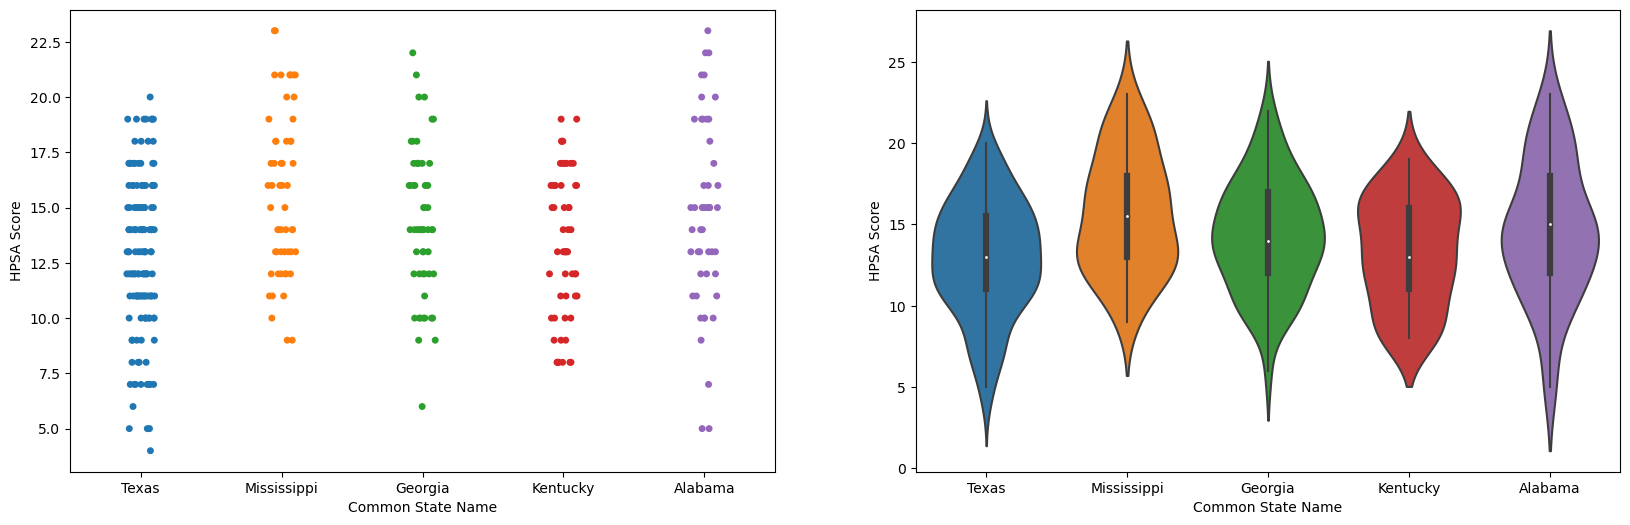

In [61]:
# Create barplot and boxplot for HPSA Score by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(sesc, x = 'Common State Name', y = 'HPSA Score', hue = 'Common State Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(sesc, x = 'Common State Name', y = 'HPSA Score')

plt.show()

### Let's focus on Mississippi.